In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib notebook

In [2]:
life_sat = pd.read_csv("datasets/lifesat/oecd_bli_2015.csv", thousands=',')

In [3]:
life_sat_total = life_sat[ life_sat["INEQUALITY"]=="TOT" ]

In [4]:
life_sat_total = life_sat_total.pivot(index="Country", columns="Indicator", values="Value")

In [5]:
life_sat_total.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [6]:
gdp_per_capita = pd.read_csv("datasets/lifesat/gdp_per_capita.csv", thousands=',',
                             delimiter='\t',encoding='latin1', 
                             na_values="n/a", index_col="Country")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

In [7]:
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [8]:
X = gdp_per_capita["GDP per capita"]
y = life_sat_total["Life satisfaction"]

In [9]:
aa = pd.merge(X, y, left_index=True, right_index=True)

In [10]:
aa = aa[ aa["GDP per capita"] <=60000 ]

<IPython.core.display.Javascript object>


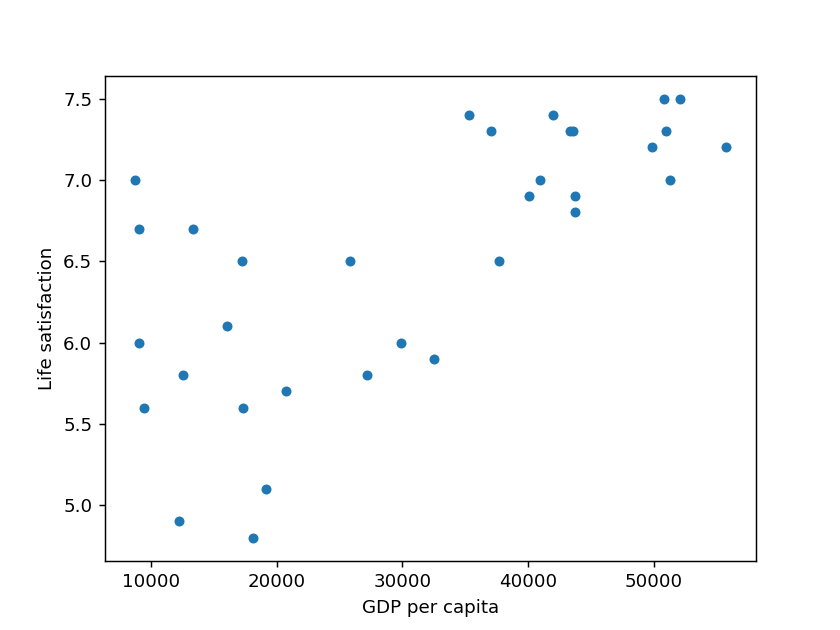

In [11]:
aa.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")

In [12]:
lin_reg_model = sklearn.linear_model.LinearRegression()

In [13]:
X_1 = aa[["GDP per capita"]]
y_1 = aa[["Life satisfaction"]]
X_2 = aa["GDP per capita"]
y_2 = aa["Life satisfaction"]

In [14]:
lin_reg_model.fit(X_1, y_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lin_reg_model.predict([[20732], [10000]])

array([[6.15841904],
       [5.77197581]])

<IPython.core.display.Javascript object>


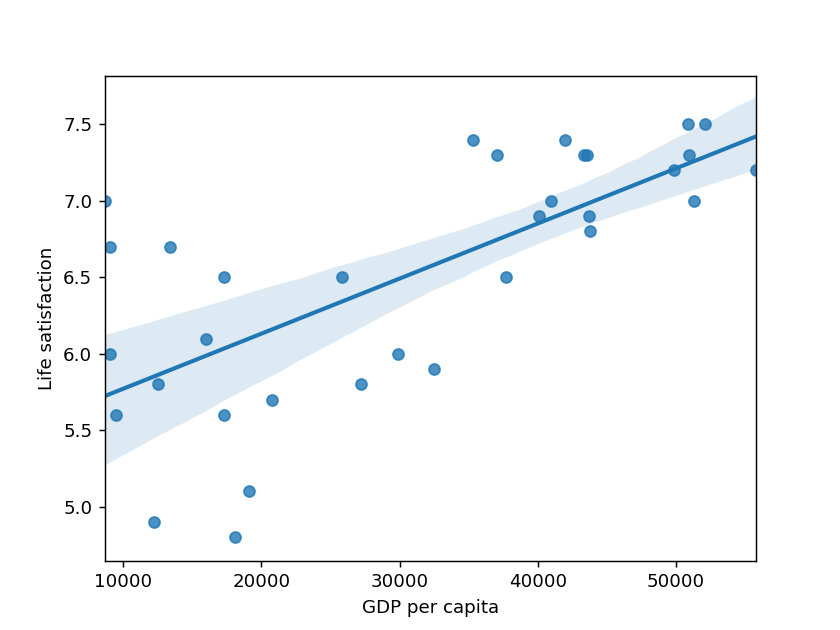

In [16]:
sns.regplot(x="GDP per capita", y="Life satisfaction", data=aa)